# Corso di Probabilità e Statistica - Visualizzazione delle distribuzioni

In questo capitolo introduciamo alcuni metodi per visualizzare la distribuzione di un set di dati 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # Statistica
import seaborn as sns # Grafica avanzata

In [2]:
# Generare N numeri random Gaussiani
N=1000
x = np.random.randn(N)

In [3]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

**Scatter plot**

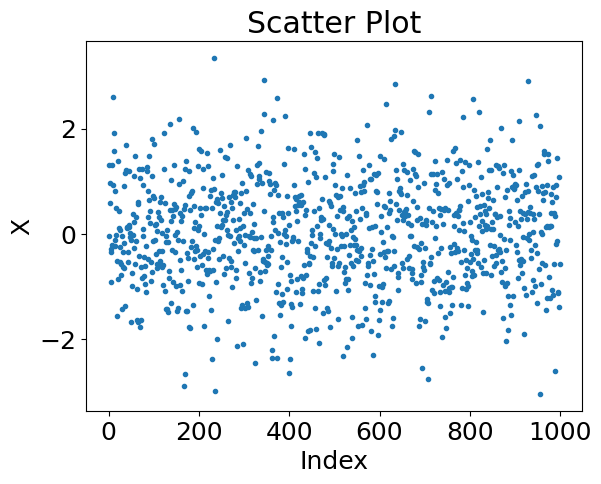

In [6]:
plt.plot(x,'.') # il punto serve solo a dire fai il grafico in cui nelle
                # y c'è il valore dei vettori e nelle x l'indice
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('X')
plt.draw()

**Istogramma**

Text(0.5, 1.0, 'Histogram, default settings')

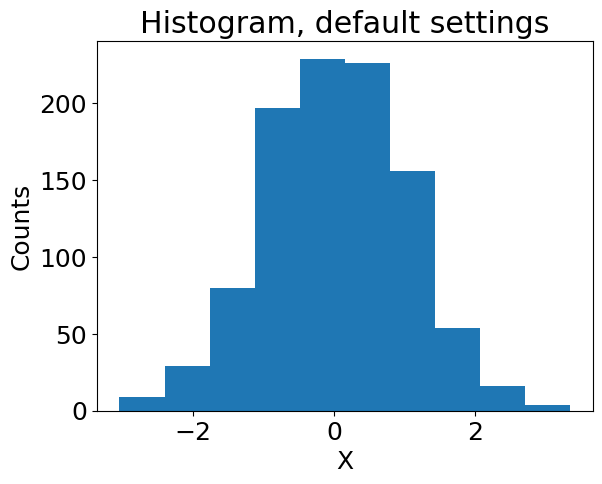

In [12]:
plt.hist(x)
plt.xlabel('X')
plt.ylabel('Counts')
plt.title('Histogram, default settings')

Text(0.5, 1.0, 'Histogram, 50 bins')

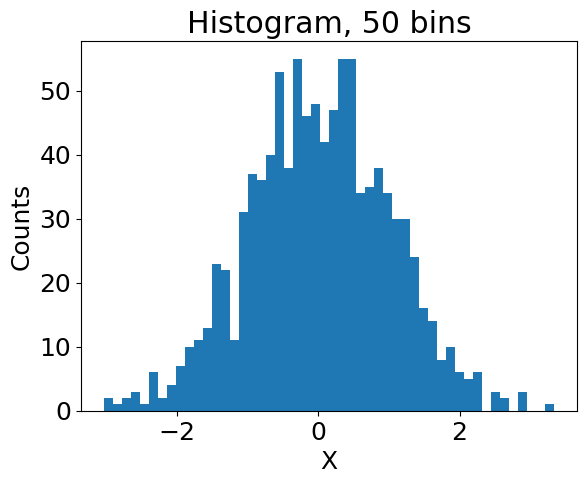

In [13]:
# cambiare il numero di bins
plt.hist(x,bins=50)
plt.xlabel('X')
plt.ylabel('Counts')
plt.title('Histogram, 50 bins')

**Esercizio**

Alcuni varianti da provare (una alla volta o combinate). 
Per maggiori istruzioni vedi:
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html

range: tuple or None, default: None

density: bool, default: False

cumulative: bool or -1, default: False

histtype: {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

log: bool, default: False

color: color or array-like of colors or None, default: None

*esempio plt.hist(x,bins=50, log=True, color="red") etc*

Text(0, 0.5, 'Counts')

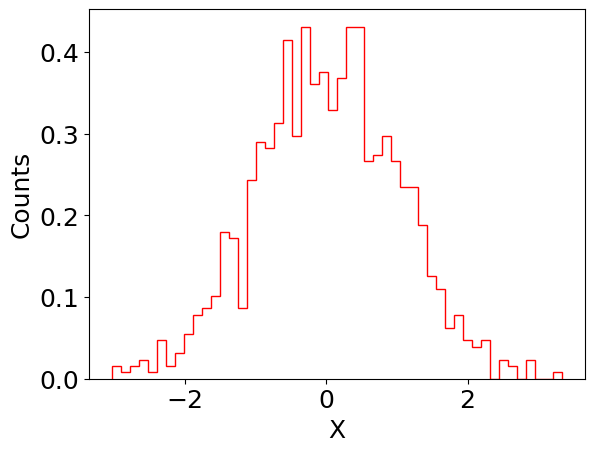

In [25]:
plt.hist(x,bins=50,density=True,histtype="step", color="red")
plt.xlabel('X')
plt.ylabel('Counts')

**KDE (kernel density estimation)**

vedi: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0, 0.5, 'Density')

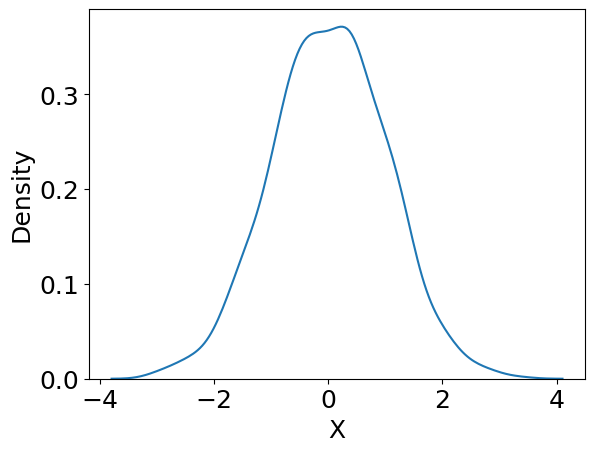

In [27]:
sns.kdeplot(x) # Un metodo utile KDE è fare un'approssimazione dei dati.
               # La migliore curva che approssima i dati
               # Fit locale mobile ma attenzione! I picchi sono strani
plt.xlabel('X')
plt.ylabel('Density')

**Istogramma + KDE : distplot**

Vedi: https://seaborn.pydata.org/generated/seaborn.distplot.html

/tmp/ipykernel_6593/2026182111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x) # Curva approssimata più binnaggi


Text(0, 0.5, 'Density')

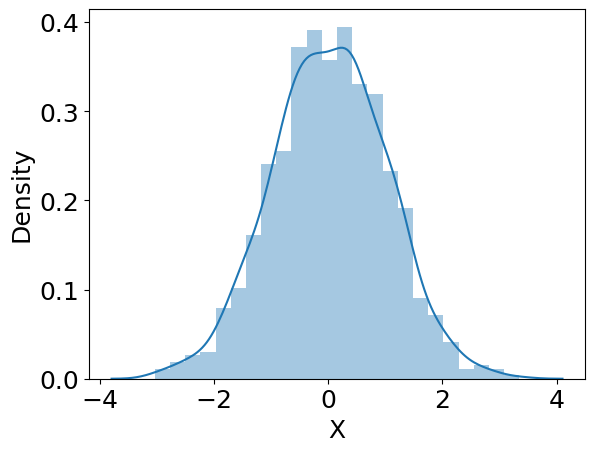

In [29]:
sns.distplot(x) # Curva approssimata più binnaggi
plt.xlabel('X')
plt.ylabel('Density')

**Distribuzione cumulata** (con bins)

con scipy.stats

Text(0.5, 1.0, 'Cumulative probablity density function')

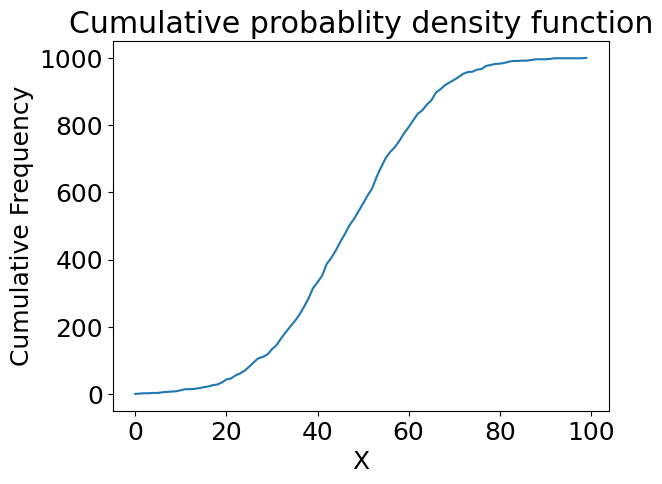

In [30]:
numbins = 100
cdf = stats.cumfreq(x,numbins)
plt.plot(cdf[0])
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative probablity density function')

Alternativa: matplotlib

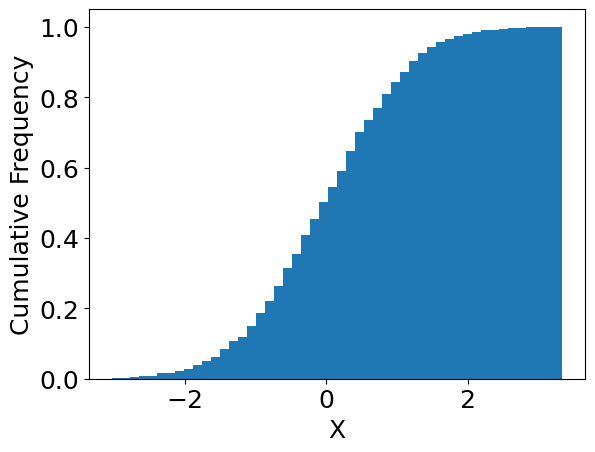

In [31]:
plt.hist(x,bins=50,cumulative=True,density=True)
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.show()

Alternativa: seaborn

Text(0, 0.5, 'Cumulative Frequency')

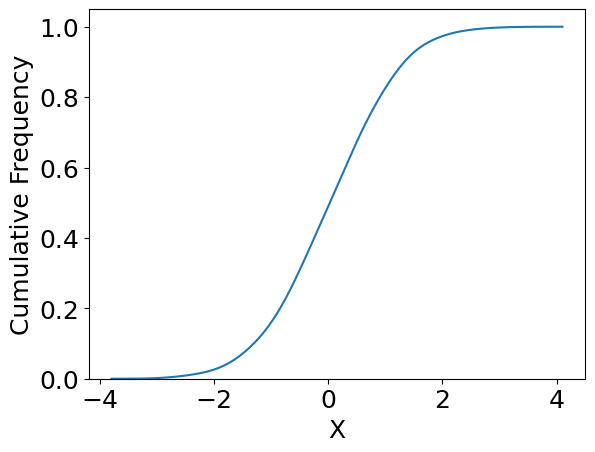

In [32]:
sns.kdeplot(x , cumulative=True)
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')

**Distribuzione cumulata** (senza bins)

Possiamo ottenere la distribuzione cumulata in modo indipendente dai bin semplicemente ordinando i numeri random e plottandoli in funzione del rank /N. Questa è anche considerata anche la migliore.

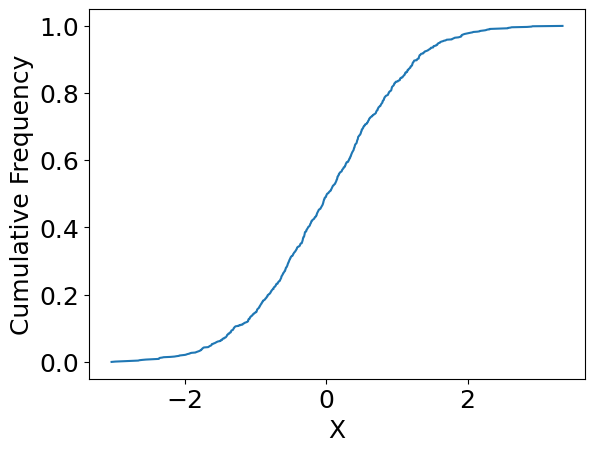

In [35]:
y=np.sort(x)
idx = [ i/len(y) for i in range(len(y))]
plt.xlabel('X')
plt.ylabel('Cumulative Frequency')
plt.plot(y,idx)

Per precisione usiamo degli steps (più corretto per pochi dati)

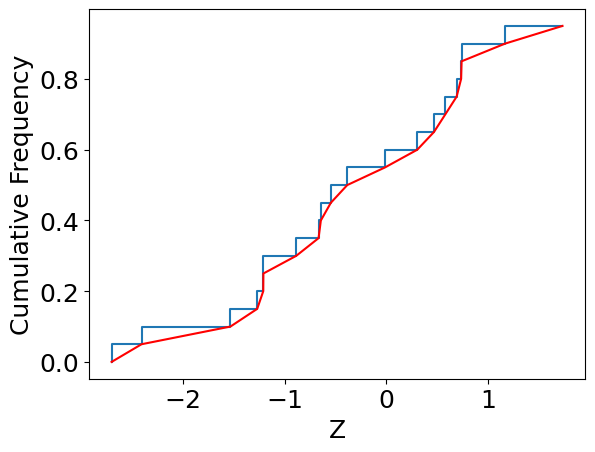

In [34]:
z=np.random.randn(20)
y=np.sort(z)
idx = [ i/len(y) for i in range(len(y))]
plt.xlabel('Z')
plt.ylabel('Cumulative Frequency')
plt.step(y,idx, label="Steps")
plt.plot(y,idx, color="red" , label="Line")